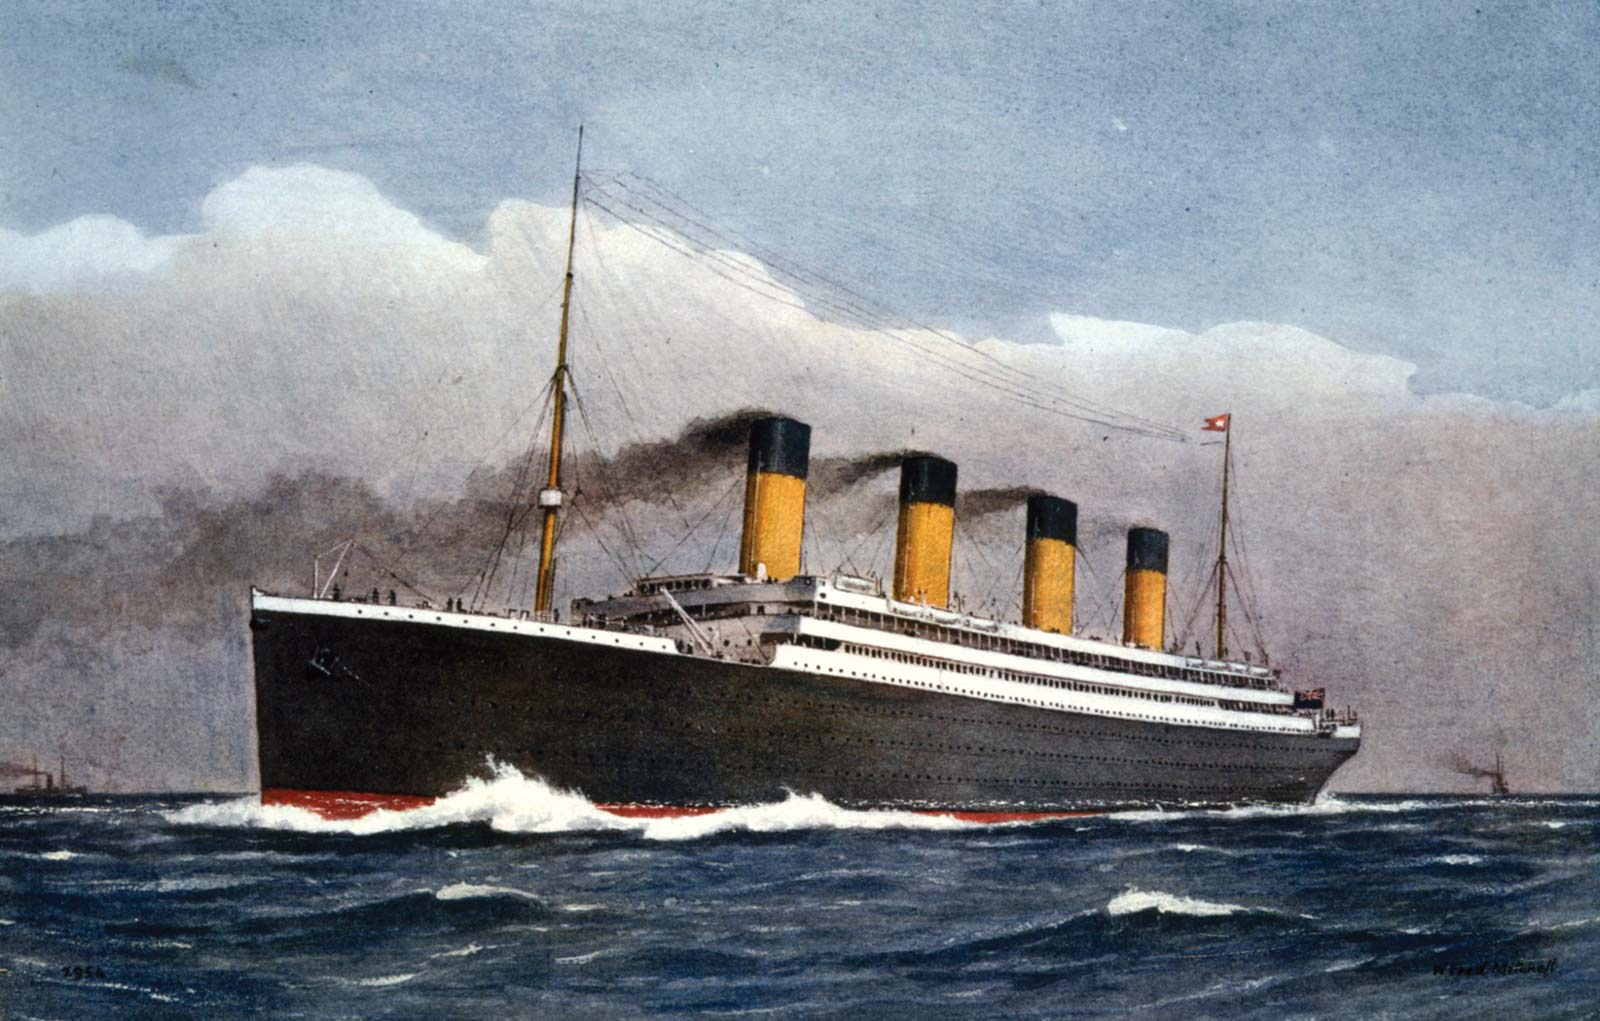

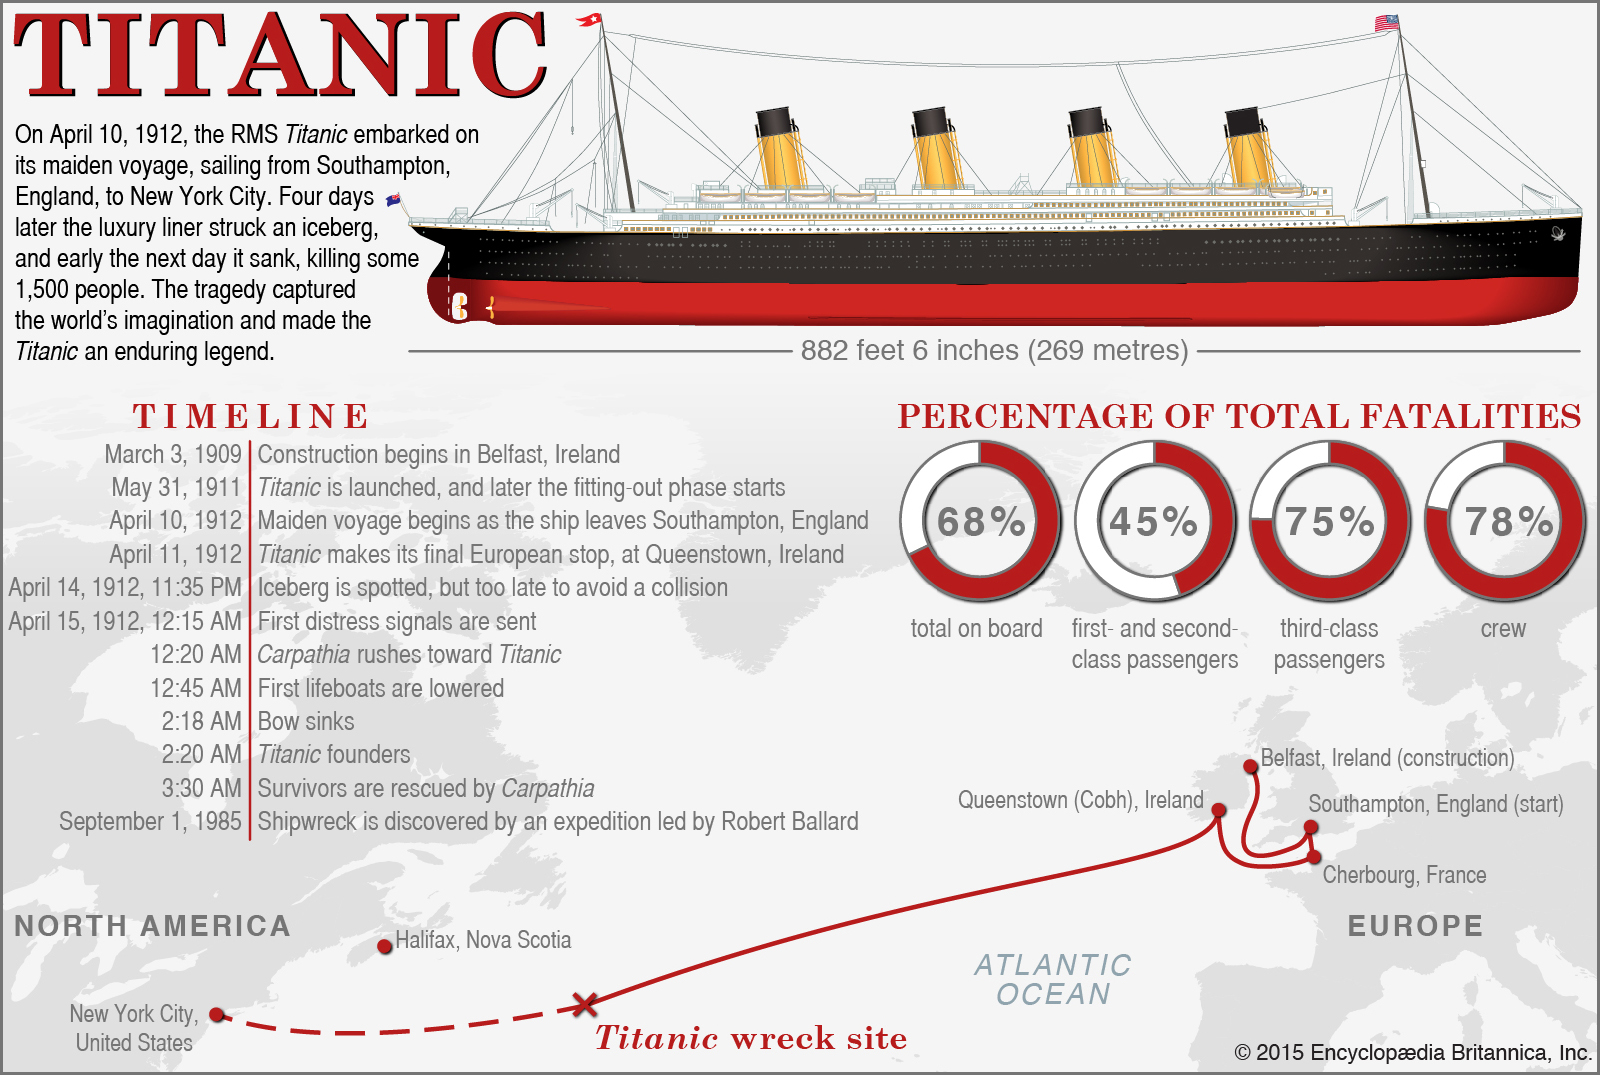

## **Importing the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = pd.read_csv("Data/Titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_index = len(titanic)
print('No. of rows in titanic: ', titanic_index)

No. of rows in titanic:  891


In [4]:
titanic.shape

(891, 12)

## **Exploring the dataset**

In [5]:
list(titanic.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

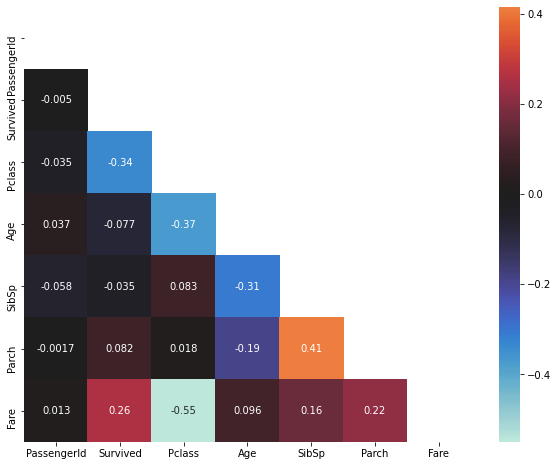

In [9]:
plt.figure(figsize = (10,8))
cor = np.triu(titanic.corr())
sns.heatmap(data = titanic.corr(), center = 0, annot = True, mask = cor)

## **Exploratory Data Analysis**

### 1. Pclass

In [10]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

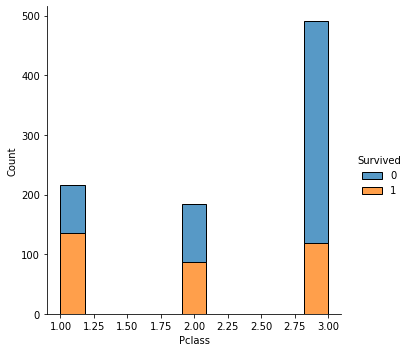

In [11]:
sns.displot(data = titanic, x = 'Pclass', hue = 'Survived', multiple = 'stack')

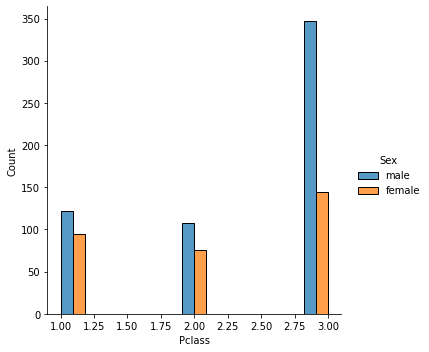

In [12]:
sns.displot(data = titanic, x = 'Pclass', hue = 'Sex', multiple = 'dodge' )

### 2. Sex

In [13]:
x = titanic[['Sex', 'Survived']].value_counts()
print(x)
print()
print(f"Total Female = {x.loc['female'].sum()}")
print(f"Survived Female = {x.loc['female'][1]}")
print(f"% Female Survived = {(x.loc['female'][1]/x.loc['female'].sum())*100} ")
print()
print(f"Total Male = {x.loc['male'].sum()}")
print(f"Survived Male = {x.loc['male'][1]}")
print(f"% Male Survived = {(x.loc['male'][1]/x.loc['male'].sum())*100} ")

Sex     Survived
male    0           468
female  1           233
male    1           109
female  0            81
dtype: int64

Total Female = 314
Survived Female = 233
% Female Survived = 74.20382165605095 

Total Male = 577
Survived Male = 109
% Male Survived = 18.890814558058924 


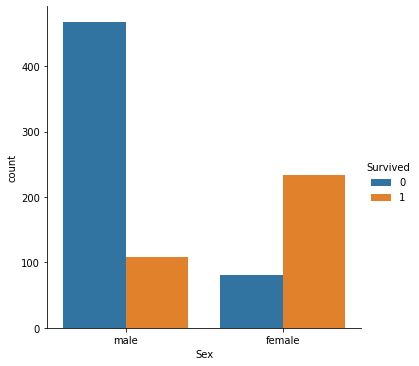

In [14]:
sns.catplot(data=titanic, kind='count', x='Sex', hue='Survived')

### 3. SibSp and Parch

In [15]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

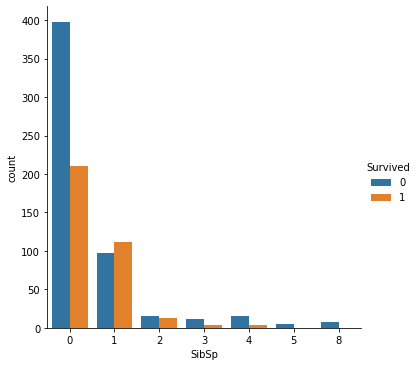

In [16]:
sns.catplot(data=titanic, kind='count' ,x='SibSp', hue='Survived')

In [17]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

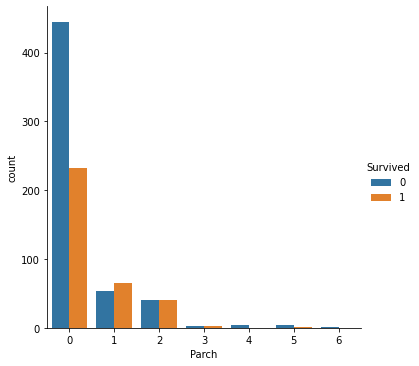

In [18]:
sns.catplot(data=titanic, kind='count' ,x='Parch', hue='Survived')

### 4. Fare

<AxesSubplot:xlabel='Fare', ylabel='Count'>

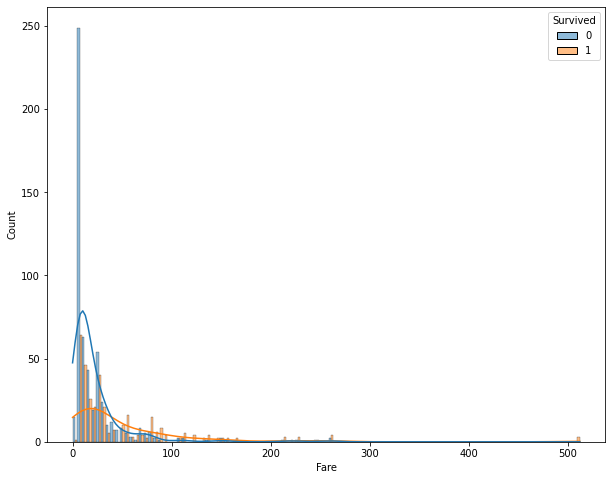

In [19]:
plt.figure(figsize = (10,8))
sns.histplot(data = titanic, x = 'Fare', kde = True, hue = 'Survived', multiple = 'dodge')

### 5. Embarked

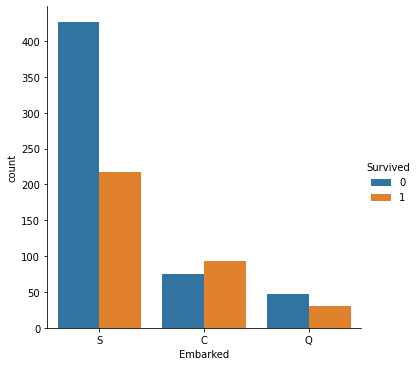

In [20]:
sns.catplot(data=titanic, x='Embarked', hue='Survived', kind='count')

### 6. Ticket

In [21]:
titanic['Ticket'].sample(10)

702                2691
816    STON/O2. 3101290
445               33638
383              113789
759              110152
100              349245
599            PC 17485
642              347088
142    STON/O2. 3101279
635              237668
Name: Ticket, dtype: object

In [22]:
titanic['Ticket'].nunique()

681

### 7. Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

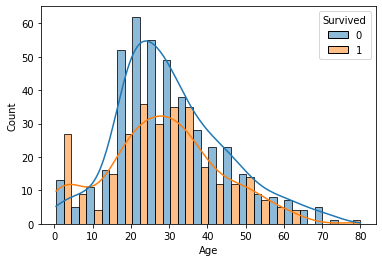

In [23]:
sns.histplot(data = titanic, x = 'Age', kde = True, hue = 'Survived', multiple = 'dodge')

### 8. Cabin

In [24]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

## **Data Preprocessing**

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
titanic['Embarked'].fillna('S', inplace=True)

In [27]:
titanic['Cabin'].fillna('Unknown', inplace=True)

In [28]:
titanic.groupby(['Embarked', 'Sex', 'Pclass'])['Age'].mean()

Embarked  Sex     Pclass
C         female  1         36.052632
                  2         19.142857
                  3         14.062500
          male    1         40.111111
                  2         25.937500
                  3         25.016800
Q         female  1         33.000000
                  2         30.000000
                  3         22.850000
          male    1         44.000000
                  2         57.000000
                  3         28.142857
S         female  1         33.456522
                  2         29.719697
                  3         23.223684
          male    1         41.897188
                  2         30.875889
                  3         26.574766
Name: Age, dtype: float64

In [29]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(['Embarked', 'Sex', 'Pclass'])['Age'].transform('mean'))

In [30]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## **Feature Engineering**

### Age-range:

In [31]:
print('Minimum age: ', titanic.Age.min())
print('Maximum age: ', titanic.Age.max())

Minimum age:  0.42
Maximum age:  80.0


In [32]:
titanic['Age-range'] = pd.cut(titanic['Age'], bins = [0,5,19,35,60,80 ], labels = ['infant', 'kid', 'young', 'adult', 'old'] )
titanic['Age-range'].unique()

['young', 'adult', 'infant', 'kid', 'old']
Categories (5, object): ['infant' < 'kid' < 'young' < 'adult' < 'old']

In [33]:
titanic['Age'] = titanic['Age'].apply(lambda x: round(x, 2))

### Title:

In [34]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [35]:
titanic['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Ms                1
Lady              1
Jonkheer          1
Mme               1
Capt              1
the Countess      1
Sir               1
Don               1
Name: Title, dtype: int64

In [36]:
titanic['Title'] = titanic['Title'].map({
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Dr',
    'Rev': 'Rev',
    'Col': 'Officer',
    'Major': 'Officer',
    'Ms': 'Miss',
    'Mlle': 'Miss',
    'the Countess': 'Royalty',
    'Capt': 'Officer',
    'Dona': 'Royalty',
    'Lady': 'Royalty',
    'Don': 'Royalty',
    'Jonkheer': 'Mr',
    'Sir': 'Mr',
    'Mme': 'Mrs',
})
titanic['Title'].value_counts()

Mr         519
Miss       185
Mrs        126
Master      40
Dr           7
Rev          6
Officer      5
Royalty      3
Name: Title, dtype: int64

### Family-size:

In [37]:
titanic['Family-size'] = titanic['SibSp']+titanic['Parch']+1

### Deck:

In [38]:
titanic['Deck'] = titanic['Cabin'].apply(lambda x: x[0])

titanic['Deck'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Deck, dtype: int64

In [39]:
titanic.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

## **Encoding categorical variables**

In [40]:
# Creating dummy variables for embarked, title, sex and age-range

emb = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titl = pd.get_dummies(titanic['Title'], prefix='Title')
sex = pd.get_dummies(titanic['Sex'], prefix='Sex')
age = pd.get_dummies(titanic['Age-range'], prefix='Age')

# Concatenating dummy variables to dataframe
titanic = pd.concat([titanic, emb, titl, sex, age], axis=1)

# Droping intial variables
titanic.drop(['Embarked', 'Title', 'Sex', 'Age-range'], axis=1, inplace=True)

In [41]:
# Label encoding Deck values:
# A:1, B:2, C:3, D:4, E:5, F:6, G:7, T:8, U:0

titanic['Deck'] = titanic['Deck'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':0})

In [42]:
print(titanic.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'Fare', 'Family-size',
       'Deck', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Dr',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Rev', 'Title_Royalty', 'Sex_female', 'Sex_male', 'Age_infant',
       'Age_kid', 'Age_young', 'Age_adult', 'Age_old'],
      dtype='object')


In [43]:
titanic.head()

,PassengerId,Survived,Pclass,Age,Fare,Family-size,Deck,Embarked_C,Embarked_Q,Embarked_S,...,Title_Officer,Title_Rev,Title_Royalty,Sex_female,Sex_male,Age_infant,Age_kid,Age_young,Age_adult,Age_old
0,1,0,3,22.0,7.2500,2,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
1,2,1,1,38.0,71.2833,2,3,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,1,3,26.0,7.9250,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,4,1,1,35.0,53.1000,2,3,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,5,0,3,35.0,8.0500,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


## **Splitting into train and test** 

In [44]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [46]:
import warnings
warnings.filterwarnings('ignore')

## **Choosing ML model**

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

scores = {}
for i in range(1,10):
    model2 = LogisticRegression(max_iter=200*i)
    model2.fit(X_train, y_train)
    score = model2.score(X_test, y_test)
    scores[200*i] = score

print('Scores for differet value of max_iter:')
for i,j in scores.items():
    print(i, ' : ', j)

Scores for differet value of max_iter:
200  :  0.8212290502793296
400  :  0.8268156424581006
600  :  0.8156424581005587
800  :  0.8212290502793296
1000  :  0.8212290502793296
1200  :  0.8212290502793296
1400  :  0.8268156424581006
1600  :  0.8156424581005587
1800  :  0.8156424581005587


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

scores = {}
for i in range(1,10):
    model3 = RandomForestClassifier(n_estimators = 200*i, random_state=0)
    model3.fit(X_train, y_train)
    score = model3.score(X_test, y_test)
    scores[200*i] = score

x=[]
y=[]
print('Score for different values of n_estimators:')
for i,j in scores.items():
#     print(i, ' : ', j)
    x.append(i)
    y.append(round(j,3))

Score for different values of n_estimators:


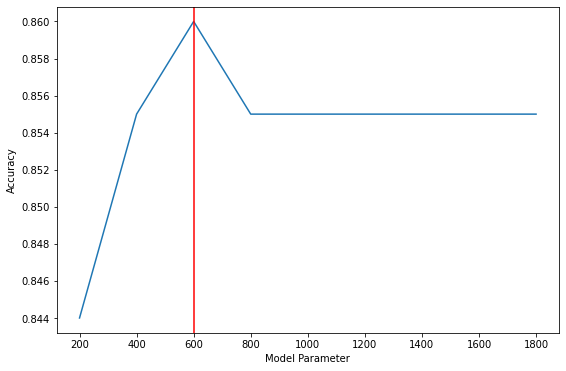

In [49]:
from matplotlib.pyplot import figure
accuracy = pd.DataFrame()
accuracy['Model Parameter'] = x
accuracy['Accuracy'] = y

plt.figure(figsize=(9, 6))
sns.lineplot(data= accuracy, x = 'Model Parameter', y = 'Accuracy')
plt.axvline(x[np.argmax(y)], color='red')
plt.show()

In [50]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(n_estimators=600, random_state=0)
rforest.fit(X_train, y_train)
predictions = rforest.predict(X_test)
score = rforest.score(X_test, y_test)

In [51]:
score

0.8603351955307262

---